<center><h1>Adatfájlok, hisztogramok, logaritmikus ábrák és fényképek</h1></center><br>

Ebben a Notebookban bemutatjuk a hogyan kell adatfájlokat beolvasni/kimenteni, hisztogramokat készíteni, logaritmikus tengelyeket beállítani.

In [2]:
%pylab inline 
figsize(6,6) #Képméret megváltoztatása

Populating the interactive namespace from numpy and matplotlib


# Adatfájlok kezelése a numpy csomaggal

A `numpy` csomag segítségével lehetőség van adatfájlok beolvasására változókba, illetve változók adatait kimenteni fájlokba.

## Adatok beolvasása fájlból

Adatok beolvasását a `numpy` **`loadtxt`**  parancsa teszi lehetővé. Számos kapcsolója van, melyekkel megadható, hogy mi az oszlopelválasztó karakter, melyik oszlopot akarjuk beolvasni stb.

In [3]:
figsize(7,7)
data=loadtxt("sinusadatok.dat")
print(type(data))
print(ndim(data))
print(data)

<class 'numpy.ndarray'>
2
[[  0.          0.          2.0312   ]
 [  0.0159236   0.0159229   2.08116  ]
 [  0.0318471   0.0318418   2.43211  ]
 ..., 
 [ 15.8758     -0.167046    2.68881  ]
 [ 15.8917     -0.182724    2.86203  ]
 [ 15.9076     -0.198356    3.0767   ]]


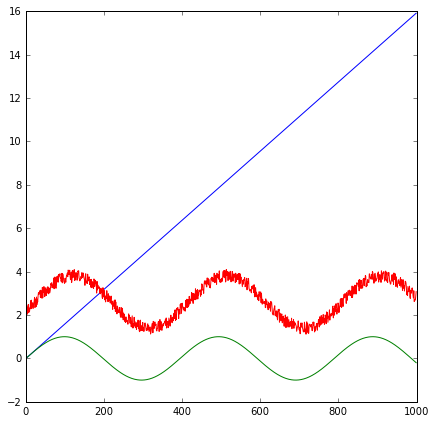

In [4]:
plot(data)

In [5]:
x=data[:,0]
print(x[0:10])

[ 0.         0.0159236  0.0318471  0.0477707  0.0636943  0.0796178
  0.0955414  0.111465   0.127389   0.143312 ]


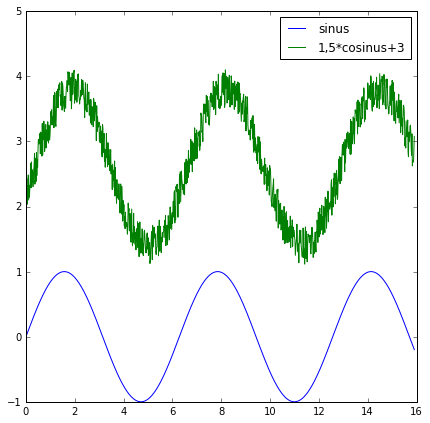

In [6]:
y=data[:,1]
z=data[:,2]
plot(x,y, label="sinus")
plot(x,z, label="1,5*cosinus+3")
legend(loc='best') # Ábrafelirat elhelyezése

## Adatok mentése fájlba

Adatokat (listákat, tömböket) a `savetxt` paranccsal lehet.

In [7]:
x = arange(0.0,5.0,1.0)        # hozzuk létre x,y és z listát
y = arange(0.0,5.0,1.0)
z = arange(0.0,5.0,1.0)
savetxt('adat.csv', x, delimiter=',')  # Mentsük le x-t mint egy vektort
savetxt('adat1.csv', (x,y,z))          # Mentsük el 2Dimenziós vektroként 
                                       #az x,y,z-t (egymás alá írva őket)
savetxt('adat2.csv', x, fmt='%1.4e')   # Formatban megadható a kiírt adatok formátuma
                                       # használhatunk exponenciális alakot a fájlban

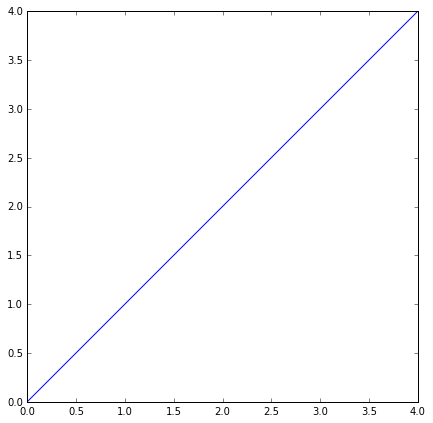

In [8]:
xx=loadtxt("adat.csv",  delimiter=',')
plot(xx)

[[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]


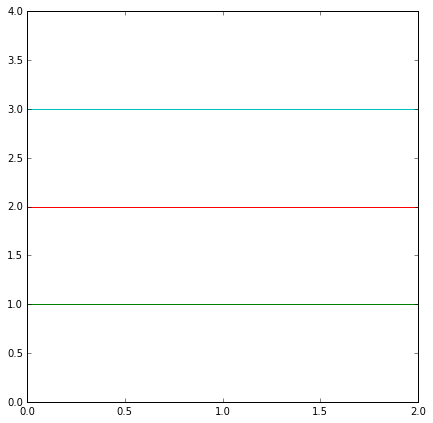

In [9]:
yy=loadtxt("adat1.csv",)
print(yy)
plot(yy)

In [10]:
zz=loadtxt("adat2.csv")
print(zz)

[ 0.  1.  2.  3.  4.]


# Hisztogramok készítése

Ehhez használni kell **`hist`** függvényt `matplotlib.pyplot` csomagból. 
3 objektuma van a `hist` függvénynek: 
- n: binekben levő darabszám vagy valószínűség
- bins: binek
- patches: a létrehozott téglalapok információi

In [12]:
# Legyen egy adatsorunk normál eloszlású
mu, sigma = 2, 0.5                #  átlaga 2, szorásnégyzete 0.5
v = random.normal(mu,sigma,10000) # Készítsünk egy 10000 elemű véletelen számsort
print(v)

[ 1.993849    2.55157255  2.19095708 ...,  1.82069143  2.28879153
  1.95668245]


(array([   1.,    6.,    5.,    9.,    4.,   17.,   21.,   32.,   60.,
          69.,  115.,  138.,  174.,  217.,  287.,  322.,  402.,  446.,
         516.,  553.,  600.,  669.,  632.,  577.,  588.,  602.,  504.,
         426.,  445.,  362.,  292.,  241.,  188.,  138.,  113.,   59.,
          64.,   39.,   25.,   12.,   14.,    7.,    5.,    1.,    0.,
           2.,    0.,    0.,    0.,    1.]),
 array([ 0.23053514,  0.3092266 ,  0.38791806,  0.46660951,  0.54530097,
         0.62399243,  0.70268388,  0.78137534,  0.8600668 ,  0.93875825,
         1.01744971,  1.09614117,  1.17483263,  1.25352408,  1.33221554,
         1.410907  ,  1.48959845,  1.56828991,  1.64698137,  1.72567282,
         1.80436428,  1.88305574,  1.96174719,  2.04043865,  2.11913011,
         2.19782157,  2.27651302,  2.35520448,  2.43389594,  2.51258739,
         2.59127885,  2.66997031,  2.74866176,  2.82735322,  2.90604468,
         2.98473613,  3.06342759,  3.14211905,  3.2208105 ,  3.29950196,
         3.37819

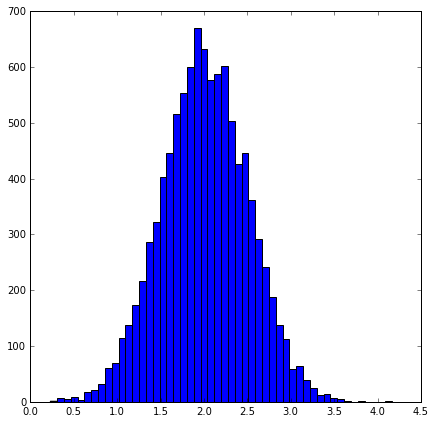

In [14]:
hist(v, bins=50)       # Készítsünk 50 binből álló hisztogramot (matplotlib-el)
# show()

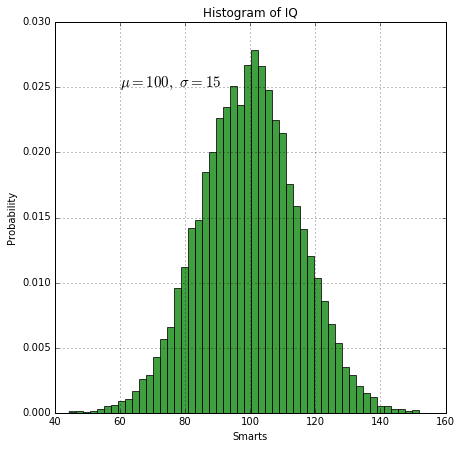

In [15]:
mu, sigma = 100, 15
x = mu + sigma * random.randn(10000)

n, bins, patches = hist(x, 50, normed=1, facecolor='g', alpha=0.75) 

xlabel('Smarts')
ylabel('Probability')
title('Histogram of IQ')
text(60, .025, r'$\mu=100,\ \sigma=15$', fontsize=15) # Szöveg elhelyezése az ávbrában (x,y helyen)
axis([40, 160, 0, 0.03])
grid(True)         # rács megjelenítése
# show()

## Hisztogram ábrázolása, az eloszlásfüggvénnyel közösen

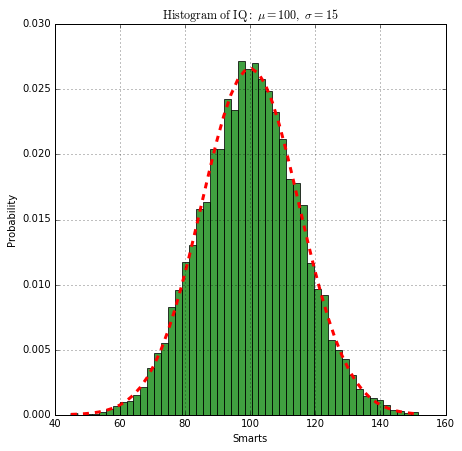

In [16]:
mu, sigma = 100, 15
x = mu + sigma*random.randn(10000)

# oszlopdiagram készítése
n, bins, patches = hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# addjuk hozzá a numerikus görbét
y = normpdf( bins, mu, sigma)
l = plot(bins, y, 'r--', linewidth=3)

xlabel('Smarts')
ylabel('Probability')
title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
axis([40, 160, 0, 0.03])
grid(True)

# show()

## Logaritmikus tengelyek beállítása

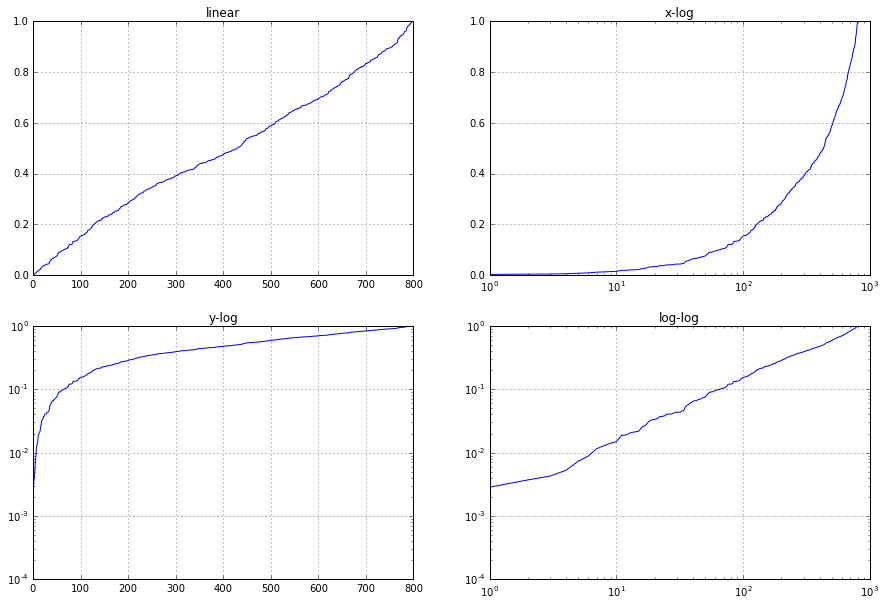

In [19]:
figsize(15,10)

# 0 és 1 közötti számok generálása, majd sorbarendezzük a "sort" paranccsal
y = random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()

x = arange(len(y)) # x legyen az y lista hosszával megegyező másik lista


# lineáris tengelyek (default)
subplot(221)
plot(x, y)
yscale('linear')
title('linear')
grid(True)


# log x tengely
subplot(222)
plot(x, y)
xscale('log')
title('x-log')
grid(True)


# log y tengely
subplot(223)
plot(x, y)
yscale('log')
title('y-log')
grid(True)

# loglog
subplot(224)
plot(x, y)
xscale('log')
yscale('log')
title('log-log')
grid(True)

